In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df=pd.read_csv("path of the file")
df=pd.read_csv("/content/IBM Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df['JobSatisfaction'].value_counts()

,count
JobSatisfaction,
4,459
3,442
1,289
2,280


In [6]:
df['Education'].value_counts()

,count
Education,
3,572
4,398
2,282
1,170
5,48


In [7]:
#creating a crosstab to examine the relation between attrition and job satisfaction
ct=pd.crosstab(df['Attrition'],df['JobSatisfaction'],margins=True)
ct

JobSatisfaction,1,2,3,4,All
Attrition,,,,,
No,223,234,369,407,1233
Yes,66,46,73,52,237
All,289,280,442,459,1470


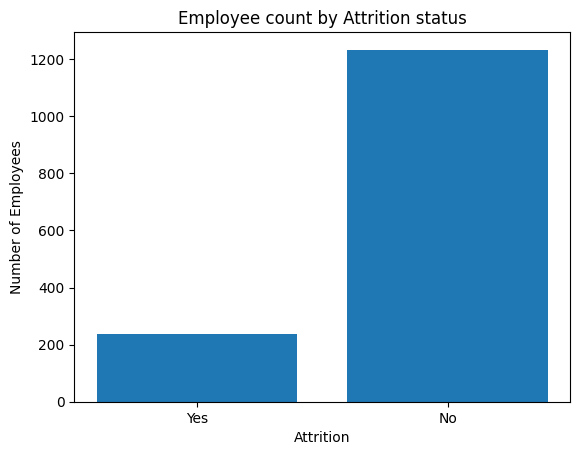

In [8]:
data={'Attrition':['Yes','No'],'Count':[237,1233]}

plt.bar(data['Attrition'],data['Count'])
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.title("Employee count by Attrition status")
plt.show()

In [9]:
#Create a crosstab between Education and Attrition
cte=pd.crosstab(df['Attrition'],df['Education'],margins=True)
cte

Education,1,2,3,4,5,All
Attrition,,,,,,
No,139,238,473,340,43,1233
Yes,31,44,99,58,5,237
All,170,282,572,398,48,1470


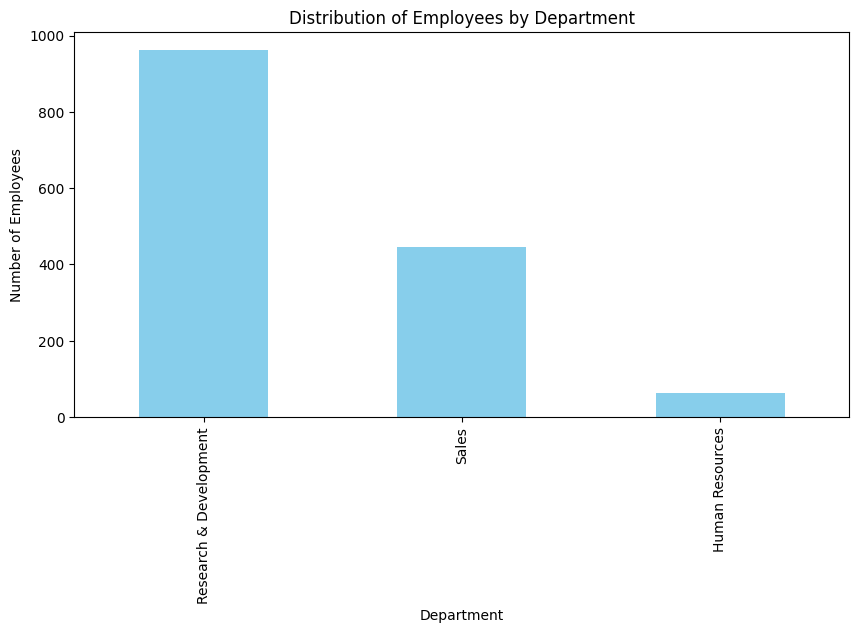

In [10]:
plt.figure(figsize=(10,5))
df['Department'].value_counts().plot(kind='bar',color='skyblue')
plt.title('Distribution of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

In [11]:
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


<Figure size 1000x500 with 0 Axes>

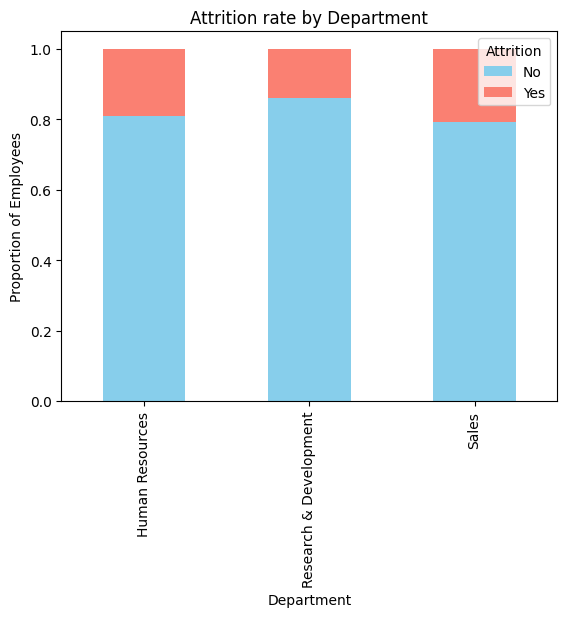

In [13]:
plt.figure(figsize=(10,5))
attrition_by_Dept=pd.crosstab(df['Department'],df['Attrition'])
attrition_by_Dept.div(attrition_by_Dept.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['skyblue','salmon'])
plt.title("Attrition rate by Department")
plt.xlabel("Department")
plt.ylabel("Proportion of Employees")
plt.show()

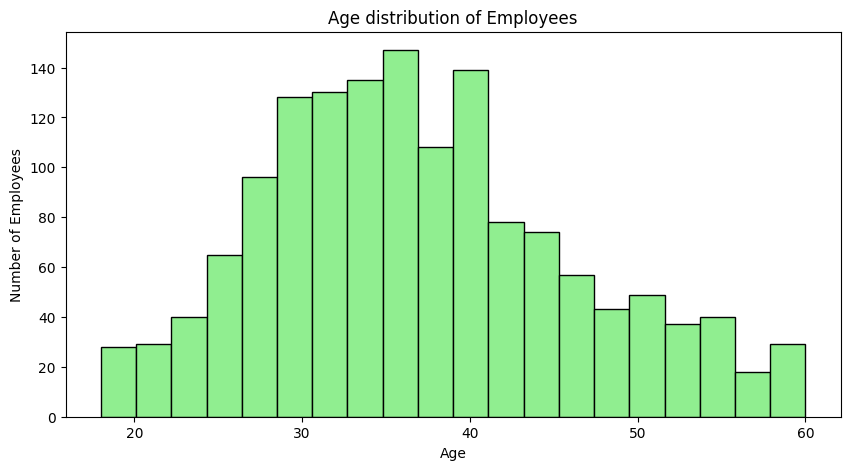

In [21]:
plt.figure(figsize=(10,5))
plt.hist(df['Age'],bins=20,color='lightgreen',edgecolor='black')
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

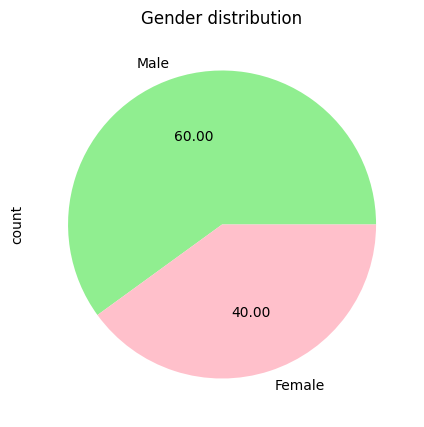

In [25]:
plt.figure(figsize=(10,5))
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f',colors=['lightgreen','pink'])
plt.title("Gender distribution")
plt.show()

In [27]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

Create a data for Education category as follows :

1- Below College

2- College

3- Bachelors

4- Masters

5- Doctor

Derive the value counts for each education category

Plot a pie chart representing the distribution of various education types present in IBM


In [28]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

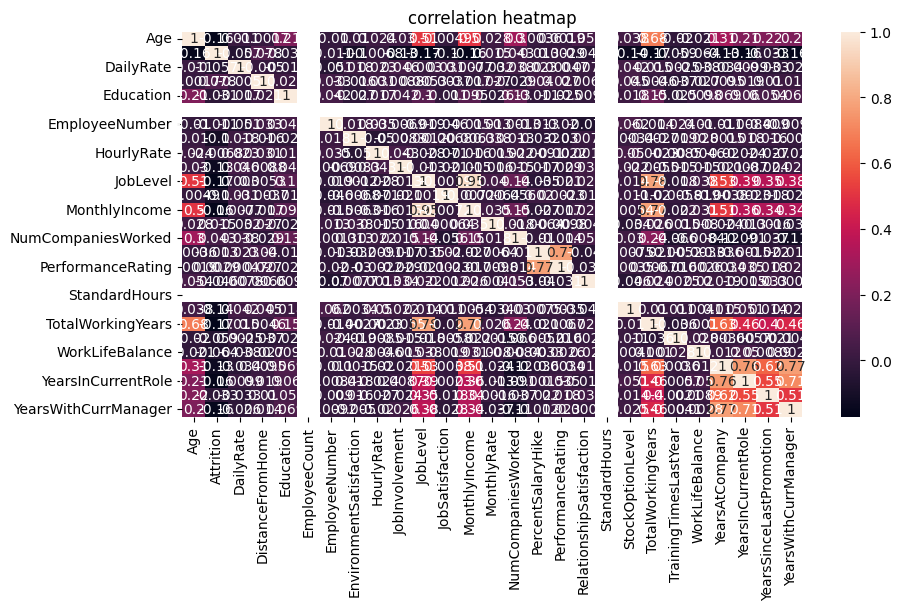

In [29]:
plt.figure(figsize=(10,5))
#convert the 'Attrition' column to numeric type
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

#select only numeric columns from the data that can be used for correlation analysis
numerical_df=df.select_dtypes(include=['int64','float64'])

corr=numerical_df.corr() #.corr() helps in computing correlation between the columns of the data
sns.heatmap(corr,annot=True)
plt.title("correlation heatmap")
plt.show()

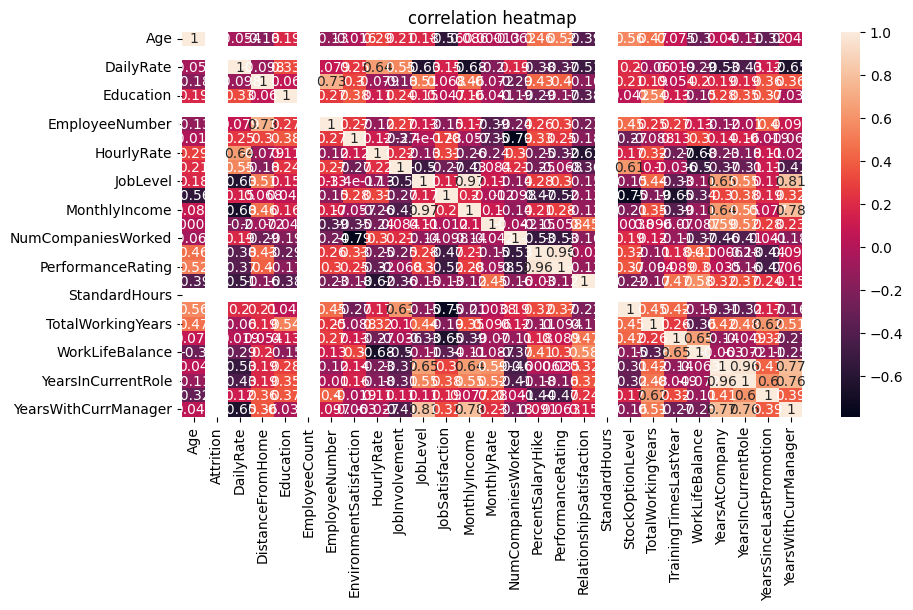

In [32]:
plt.figure(figsize=(10,5))
#convert the 'Attrition' column to numeric type
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

#select only numeric columns from the data that can be used for correlation analysis
numerical_df=df.iloc[0:10,:].select_dtypes(include=['int64','float64'])

corr=numerical_df.corr() #.corr() helps in computing correlation between the columns of the data
sns.heatmap(corr,annot=True)
plt.title("correlation heatmap")
plt.show()

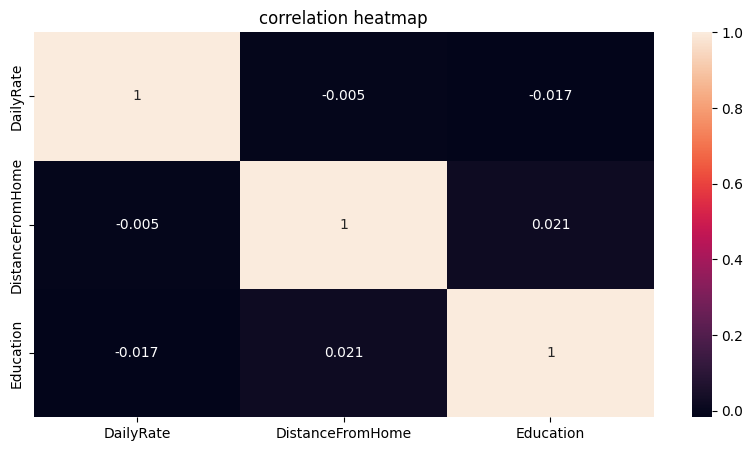

In [39]:
plt.figure(figsize=(10,5))
#convert the 'Attrition' column to numeric type
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

#select only numeric columns from the data that can be used for correlation analysis
numerical_df=df.iloc[:,2:8].select_dtypes(include=['int64','float64'])

corr=numerical_df.corr() #.corr() helps in computing correlation between the columns of the data
sns.heatmap(corr,annot=True)
plt.title("correlation heatmap")
plt.show()

In [40]:
numerical_df.iloc[:,2:8]

,Education
0,2
1,1
2,2
3,4
4,1
...,...
1465,2
1466,1
1467,3
1468,3
